## Loading artifacts and preparing the Random Forest model

In this step I load the preprocessed training and test datasets together with the saved preprocessing pipeline.
Then I create a RandomForestClassifier with 200 decision trees, a fixed random state for reproducibility, and `n_jobs=-1` to use all CPU cores for faster training.
After that, I build a full scikit-learn Pipeline that combines the preprocessor and the Random Forest model.
Using a single unified pipeline ensures that all preprocessing steps are consistently applied before prediction.

In [1]:
# 05_random_forest.ipynb

import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

artifacts = joblib.load("../Dataset/preprocessed_artifacts.pkl")

X_train = artifacts["X_train"]
X_test = artifacts["X_test"]
y_train = artifacts["y_train"]
y_test = artifacts["y_test"]
preprocessor = artifacts["preprocessor"]

# ---- Model ----
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
)

clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", rf_clf),
    ]
)

clf.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Evaluation and confusion matrix

In this block I evaluate the performance of the Random Forest model on the test set.
I first generate predictions and print the classification report, which includes precision, recall, and f1-scores for every target class.
The Random Forest performs better than the single decision tree and slightly better than logistic regression, which is typical due to the ensemble effect.

Next, I compute and display the confusion matrix to see where the model predicts correctly and where it makes mistakes.
Finally, I save the trained model using `joblib.dump()` so that I can reuse it later without retraining.

Classification report:

              precision    recall  f1-score   support

        Good       0.77      0.67      0.71      3566
        Poor       0.76      0.75      0.75      5799
    Standard       0.77      0.81      0.79     10635

    accuracy                           0.77     20000
   macro avg       0.77      0.74      0.75     20000
weighted avg       0.77      0.77      0.77     20000



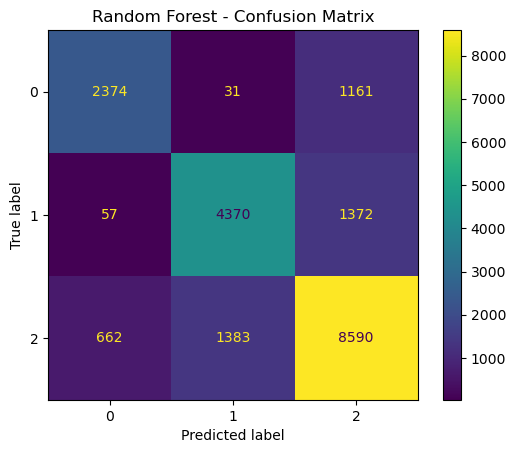

'Saved random forest model'

In [2]:
# ---- Evaluation ----
y_pred = clf.predict(X_test)

print("Classification report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

joblib.dump(clf, "../Dataset/model_random_forest.pkl")
"Saved random forest model"
